# LAB3: Applying norms and distances with signals 

In [36]:
import numpy as np 

## 1.1 generating two signals 

In [37]:
x = np.random.randn(10)
y = np.random.randn(10)

## 1.2 normalizing the signals 
(centralizing the points to the mean and then diving by the standart deviation )

In [38]:
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

In [39]:
print('mean of x : ', int(np.mean(x)))
print('mean of y :', int(np.mean(y)))

mean of x :  0
mean of y : 0


In [41]:
print('std of x',  x.std())
print('std of y ', y.std())

std of x 0.9999999999999999
std of y  1.0


## 2.1 Norms

In [42]:
def l1(vector:np.ndarray) -> float: 
    "calculate the l1 norm of a given array"
    return np.sum(np.abs(vector))


In [43]:
def l2(vector:np.ndarray) -> float: 
    "calculates l2 norm, (euclidian)"
    return np.sqrt(np.sum(vector**2))


In [58]:
def l_infini(vector:np.ndarray) -> float: 
    return np.max(np.abs(vector))

In [60]:

print('x= ', x)
print()
print('*** Differnt norms for x ***')
print('l1(x) = ', l1(x))
print('l2(x) = ', l2(x))
print('l_infini(x) = ', l_infini(x))

x=  [ 1.06957642 -1.29591891  0.18683369 -1.2955703  -0.58568675  1.45210355
 -0.1351034   0.17547224  1.4122278  -0.98393433]

*** Differnt norms for x ***
l1(x) =  8.59242738051063
l2(x) =  3.162277660168379
l_infini(x) =  1.4521035484751912


## 2.2 distances

In [61]:
def l1_distance(x:np.ndarray, y:np.ndarray) -> float: 
    return np.sum(np.absolute(x-y))

def l2_distance(x:np.ndarray, y:np.ndarray) -> float: 
    return np.sqrt(np.sum((x-y)**2))

def l_infini_distance(x:np.ndarray, y:np.ndarray) -> float: 
    return np.max(np.abs(x-y))


In [62]:
def cosine_similarity(x:np.ndarray, y:np.ndarray) -> float: 
    "calculate the coside similarity between two arrays"

    return np.dot(x,y) / (l2(x) * l2(y))

def minkowsky_distance(x:np.ndarray, y: np.ndarray, p:int) -> float: 
    "calculate the minkowsy distance between two vectors, "
    
    assert p is not None and p > 0, "P should not be zero or none"
    return np.power(np.sum(np.power(np.abs(x-y),p)), 1/p)

In [63]:

l1_d = l1_distance(x,y)
l2_d = l2_distance(x,y)
l_infini_d = l_infini_distance(x,y)
cosine_sim_dis= cosine_similarity(x,y)

p= 3
minkowsky =  minkowsky_distance(x,y,p)

print('***distances between x and y***')
print('l1 distance : ', l1_d)
print('l2 distance : ', l2_d)
print('l_infini distance : ', l_infini_d)
print('                  ')
print('cosine similarity : ',cosine_sim_dis )


print('minkosky distance (p=3): ', minkowsky)

***distances between x and y***
l1 distance :  12.197000371407816
l2 distance :  4.7701404238542615
l_infini distance :  2.412551502728469
                  
cosine similarity :  -0.13771198316442587
minkosky distance (p=3):  3.609405097965946


# plotting signals and the different distances

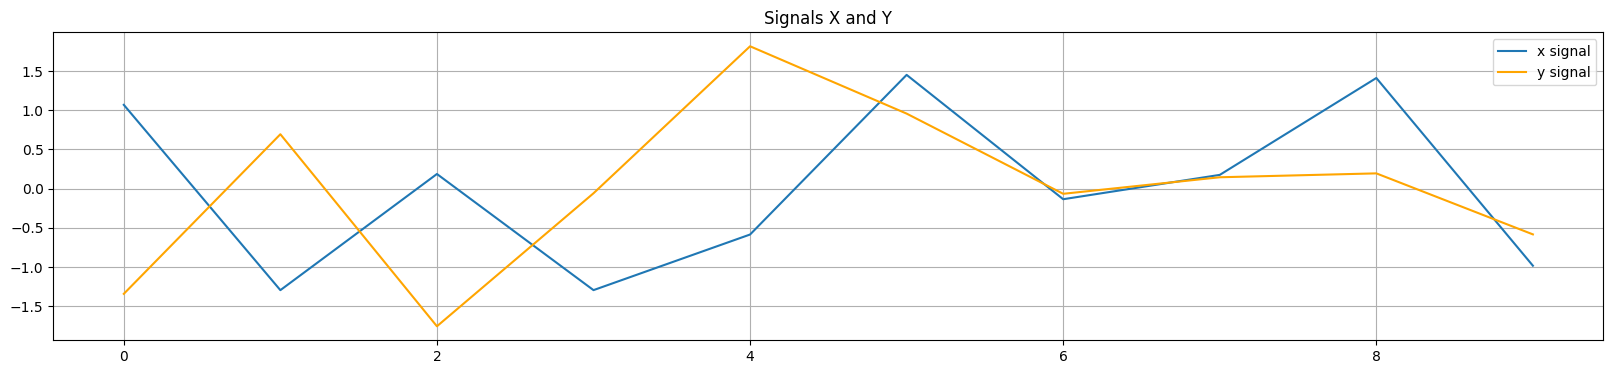

In [64]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(20,4), dpi=100)


plt.plot(x, label='x signal')
plt.plot(y, color='orange', label='y signal')


plt.title('Signals X and Y')
plt.legend()
plt.grid()
plt.show()

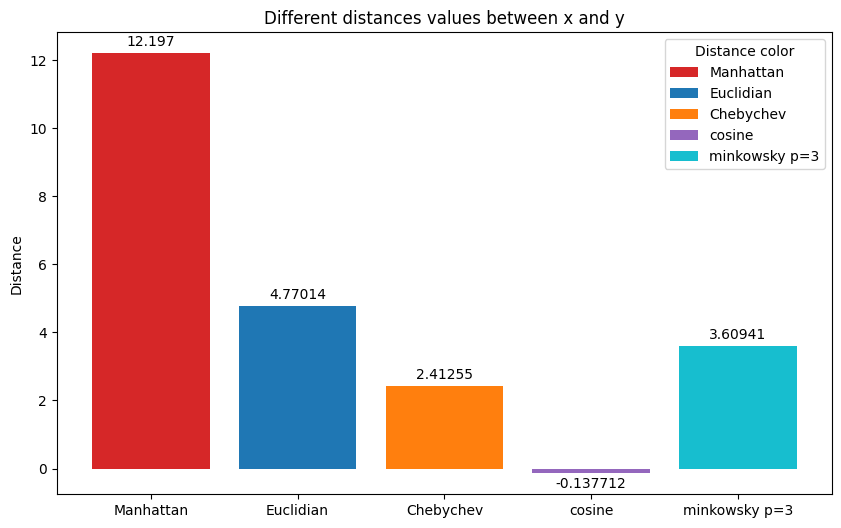

In [65]:
# displaying a histogra 
# docs : https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

import matplotlib.pyplot as plt 


fig, ax = plt.subplots(figsize=(10,6), dpi=100)

distances_labels = ['Manhattan', 'Euclidian', 'Chebychev', 'cosine', 'minkowsky p=3']
distances = [l1_d, l2_d, l_infini_d, cosine_sim_dis, minkowsky]
bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:cyan']


bars = ax.bar(distances_labels, distances, label=distances_labels, color=bar_colors)
ax.bar_label(bars, label_type='edge', padding=3)  # Use 'edge' for top, or omit padding for inside


ax.set_ylabel('Distance')
ax.set_title('Different distances values between x and y')
ax.legend(title='Distance color')

plt.show()